In [1]:
%matplotlib ipympl

In [2]:
# use standard rayoptics environment
from rayoptics.environment import *

In [3]:
import rayoptics.optical.twoconicmirrors as tcm

def apply_conics(opt_model, fct, parax_model):
    cc_m1, cc_m2 = fct(parax_model)
    opt_model.seq_model.ifcs[1].profile.cc = cc_m1
    opt_model.seq_model.ifcs[2].profile.cc = cc_m2
    opt_model.update_model()

In [4]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [5]:
app = AppManager(None)

# Create a new model

In [6]:
app.model = OpticalModel()
opm = app.model
sm  = opm.seq_model
osp = opm.optical_spec

## Define first order aperture and field for system

In [7]:
osp.pupil = PupilSpec(osp, pupil_type=PupilType.FNO, value=10.)
osp.field_of_view = FieldSpec(osp, field_type=FieldType.IMG_HT, flds=[0., 0.5])

## Define interface and gap data for the sequential model

In [8]:
sm.gaps[0].thi=1e10

sm.insert(srf.Surface(lbl='M1', refract_mode='REFL', profile=Conic(c=-0.01)), Gap(-33.))

sm.insert(srf.Surface(lbl='M2', refract_mode='REFL', profile=Conic(c=-0.01)), Gap(50.))

## Update the model

In [9]:
opm.update_model()

## Build the paraxial model and list

In [10]:
pm = opm.parax_model
pm.list_lens()
print("\n")
osp.parax_data[2].list_first_order_data()

      ax_ray_ht    ax_ray_slp
0:            0   3.78788e-10
1:       3.7879    -0.0757576
2:       1.2879         -0.05
3:      -1.2121         -0.05

      pr_ray_ht    pr_ray_slp
0:     -6.6e+07        0.0066
1:            0        0.0066
2:       0.2178      0.010956
3:       0.7656      0.010956

          power           tau        index    type
0:            0         1e+10      1.00000    
1:         0.02            33     -1.00000    REFL
2:        -0.02            50      1.00000    REFL
3:            0             0      1.00000    REFL


efl               75.76
ffl              -125.8
pp1                 -50
bfl               25.76
ppk                  50
f/#                  10
red           -1.32e+08
obj_dist          1e+10
obj_ang          0.3781
enp_dist             -0
enp_radius        3.788
na obj        3.788e-10
n obj                 1
img_dist             50
img_ht              0.5
exp_dist         -19.88
exp_radius        2.282
na img         -0.04994
n img        

In [11]:
opm.save_model('TwoMirror')

In [12]:
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0))
1 Surface(lbl='M1', profile=Conic(c=-0.01, cc=0.0))
2 Surface(lbl='M2', profile=Conic(c=-0.01, cc=0.0))
3 Surface(lbl='Img', profile=Spherical(c=0.0))


In [13]:
#abr_plt = plt.figure(FigureClass=RayFanFigure, seq_model=sm, data_type='Ray', scale_type=Fit.All_Same).plot()
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', scale_type=Fit.User_Scale, user_scale_value=0.002).plot()

FigureCanvasNbAgg()

In [14]:
yybar_plt = plt.figure(FigureClass=ParaxialDesignFigure, opt_model=opm, dgm_type=Dgm.ht, refresh_gui=None)
def refresh_yybar():
    opm.update_model()
    yybar_plt.update_data()
    yybar_plt.plot()

yybar_plt.refresh_gui=refresh_yybar

FigureCanvasNbAgg()

In [15]:
vertex=3
pm.apply_ht_dgm_data(vertex, (0.5, 0.0))
pm.paraxial_lens_to_seq_model()

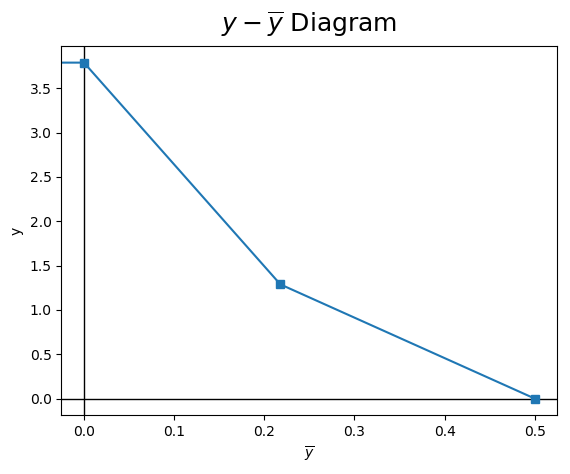

In [16]:
refresh_yybar()
yybar_plt.plot()

In [17]:
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=opm)

FigureCanvasNbAgg()

In [18]:
pm.list_lens()
print("\n")
osp.parax_data[2].list_first_order_data()

      ax_ray_ht    ax_ray_slp
0:            0   3.78788e-10
1:       3.7879    -0.0757576
2:       1.2879         -0.05
3:            0         -0.05

      pr_ray_ht    pr_ray_slp
0:     -6.6e+07        0.0066
1:            0        0.0066
2:       0.2178      0.010956
3:          0.5      0.010956

          power           tau        index    type
0:            0         1e+10      1.00000    
1:         0.02            33     -1.00000    REFL
2:        -0.02        25.758      1.00000    REFL
3:            0             0      1.00000    REFL


efl               75.76
ffl              -125.8
pp1                 -50
bfl               25.76
ppk                  50
f/#                  10
red           -1.32e+08
obj_dist          1e+10
obj_ang          0.3781
enp_dist             -0
enp_radius        3.788
na obj        3.788e-10
n obj                 1
img_dist          25.76
img_ht              0.5
exp_dist         -19.88
exp_radius        2.282
na img         -0.04994
n img        

In [19]:
vertex=2
pm.apply_ht_dgm_data(vertex, (0.2178/1.5, 2.25/1.5))
pm.paraxial_lens_to_seq_model()

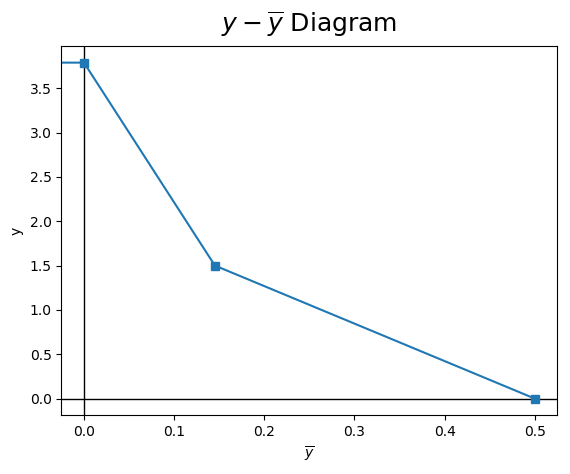

In [20]:
refresh_yybar()
yybar_plt.plot()

In [21]:
pm.list_lens()
print("\n")
osp.parax_data[2].list_first_order_data()

      ax_ray_ht    ax_ray_slp
0:            0   3.78788e-10
1:       3.7879     -0.103994
2:          1.5         -0.05
3:   2.2204e-16         -0.05

      pr_ray_ht    pr_ray_slp
0:     -6.6e+07        0.0066
1:            0        0.0066
2:       0.1452     0.0118267
3:          0.5     0.0118267

          power           tau        index    type
0:            0         1e+10      1.00000    
1:   0.02745455            22     -1.00000    REFL
2:  -0.03599633            30      1.00000    REFL
3:            0             0      1.00000    REFL


efl               75.76
ffl              -135.8
pp1              -59.99
bfl                  30
ppk               45.76
f/#                  10
red           -1.32e+08
obj_dist          1e+10
obj_ang          0.3781
enp_dist             -0
enp_radius        3.788
na obj        3.788e-10
n obj                 1
img_dist             30
img_ht              0.5
exp_dist         -12.28
exp_radius        2.114
na img         -0.04994
n img        

In [22]:
sm.list_model()

0 Surface(lbl='Obj', profile=Spherical(c=0.0))
     Gap(t=10000000000.0, medium=Air)
1 Surface(lbl='M1', profile=Conic(c=-0.013727272717823692, cc=0.0))
     Gap(t=-22.00000027666667, medium=Air)
2 Surface(lbl='M2', profile=Conic(c=-0.017998163738521585, cc=0.0))
     Gap(t=30.0, medium=Air)
3 Surface(lbl='Img', profile=Spherical(c=0.0))


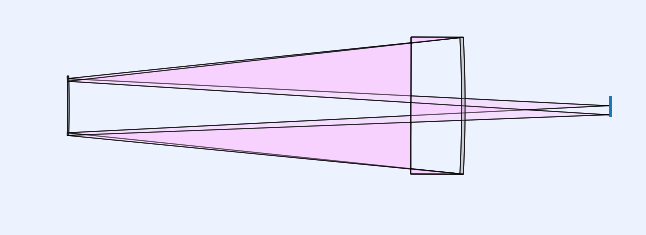

In [23]:
layout_plt.update_data()
layout_plt.plot()

In [24]:
opm.save_model('TwoMirror')

# Spherical Two Mirror

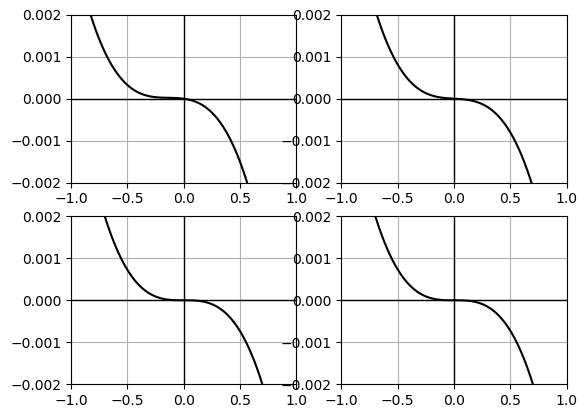

In [25]:
abr_plt.update_data()
abr_plt.plot()

In [26]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = osp.parax_data
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = sm.central_rndx(-1)
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

In [27]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

FigureCanvasNbAgg()

# Dall-Kirkham Two Mirror

In [28]:
apply_conics(opm, tcm.dall_kirkham, pm)

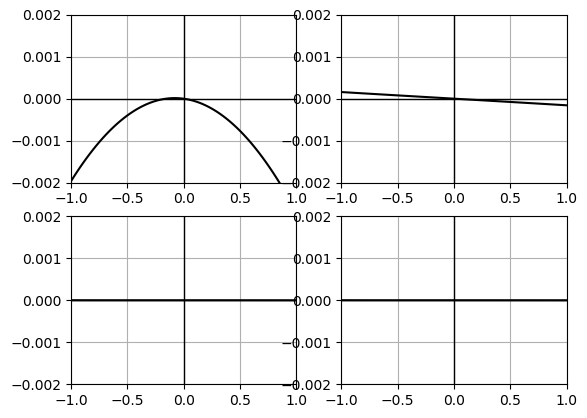

In [29]:
abr_plt.update_data()
abr_plt.plot()

In [30]:
opm.save_model('Dall_Kirkham')
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0))
1 Surface(lbl='M1', profile=Conic(c=-0.013727272717823692, cc=-0.5491583810039262))
2 Surface(lbl='M2', profile=Conic(c=-0.017998163738521585, cc=0.0))
3 Surface(lbl='Img', profile=Spherical(c=0.0))


In [31]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = osp.parax_data
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = sm.central_rndx(-1)
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

In [32]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

FigureCanvasNbAgg()

# Cassegrain Two Mirror

In [33]:
apply_conics(opm, tcm.cassegrain, pm)

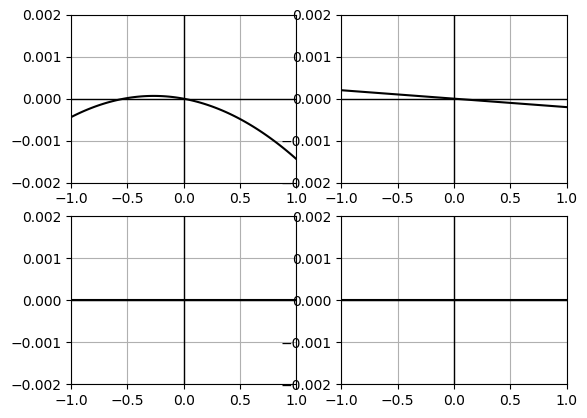

In [34]:
abr_plt.update_data()
abr_plt.plot()

In [35]:
opm.save_model('Cassegrain')
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0))
1 Surface(lbl='M1', profile=Conic(c=-0.013727272717823692, cc=-1.0))
2 Surface(lbl='M2', profile=Conic(c=-0.017998163738521585, cc=-8.134136650232055))
3 Surface(lbl='Img', profile=Spherical(c=0.0))


In [36]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = osp.parax_data
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = sm.central_rndx(-1)
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

In [37]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

FigureCanvasNbAgg()

# Ritchey-Chretien Two Mirror

In [38]:
apply_conics(opm, tcm.ritchey_chretien, pm)

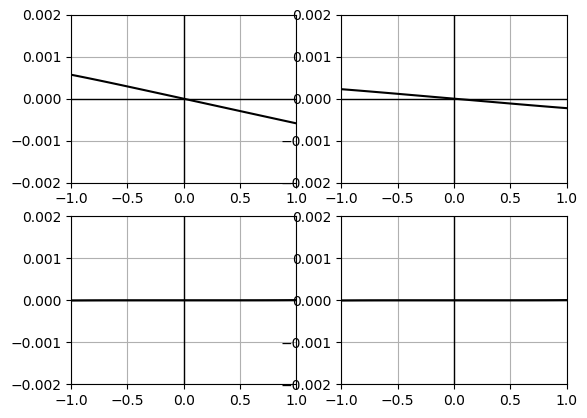

In [39]:
abr_plt.update_data()
abr_plt.plot()

In [40]:
opm.save_model('Ritchey_Chretien')
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0))
1 Surface(lbl='M1', profile=Conic(c=-0.013727272717823692, cc=-1.303115101278525))
2 Surface(lbl='M2', profile=Conic(c=-0.017998163738521585, cc=-13.602974376524408))
3 Surface(lbl='Img', profile=Spherical(c=0.0))


In [41]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = osp.parax_data
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = sm.central_rndx(-1)
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

out = widgets.Output()
with out:
    display(to_df)
    display(wv_df)
    display(fcv)
display(out)

Output()

In [42]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

FigureCanvasNbAgg()

In [43]:
wv_df.loc[:, 'W040':'W131']

,W040,W131
1,2.420552e-01,-0.122896
1.asp,-3.154258e-01,-0.000000
2,-1.091286e-01,0.052232
2.asp,1.824991e-01,0.070664
sum,-4.328364e-09,0.000000


In [44]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.loc[:, 'W040':'W131'].plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

FigureCanvasNbAgg()

# Revert to Two Spherical Mirrors

In [45]:
apply_conics(opm, tcm.spheres, pm)
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0))
1 Surface(lbl='M1', profile=Conic(c=-0.013727272717823692, cc=0.0))
2 Surface(lbl='M2', profile=Conic(c=-0.017998163738521585, cc=0.0))
3 Surface(lbl='Img', profile=Spherical(c=0.0))


In [46]:
fo.list_parax_trace(opm)

stop surface: 1
           y           u           n*i         ybar         ubar        n*ibar
 0            0  3.78788e-10  3.78788e-10     -6.6e+07       0.0066       0.0066
 1      3.78788     0.103994   -0.0519972            0      -0.0066       0.0066
 2          1.5        -0.05   -0.0769972       0.1452    0.0118267   0.00921333
 3  2.22045e-16        -0.05        -0.05          0.5    0.0118267    0.0118267


In [47]:
from rayoptics.optical.profiles import mutate_profile

sm.ifcs[1].profile = mutate_profile(sm.ifcs[1].profile, 'Spherical')
sm.ifcs[2].profile = mutate_profile(sm.ifcs[2].profile, 'Spherical')

In [48]:
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0))
1 Surface(lbl='M1', profile=Spherical(c=-0.013727272717823692))
2 Surface(lbl='M2', profile=Spherical(c=-0.017998163738521585))
3 Surface(lbl='Img', profile=Spherical(c=0.0))


In [49]:
fo.list_parax_trace(opm)

stop surface: 1
           y           u           n*i         ybar         ubar        n*ibar
 0            0  3.78788e-10  3.78788e-10     -6.6e+07       0.0066       0.0066
 1      3.78788     0.103994   -0.0519972            0      -0.0066       0.0066
 2          1.5        -0.05   -0.0769972       0.1452    0.0118267   0.00921333
 3  2.22045e-16        -0.05        -0.05          0.5    0.0118267    0.0118267


In [50]:
opm.save_model('TwoSphericalMirror')